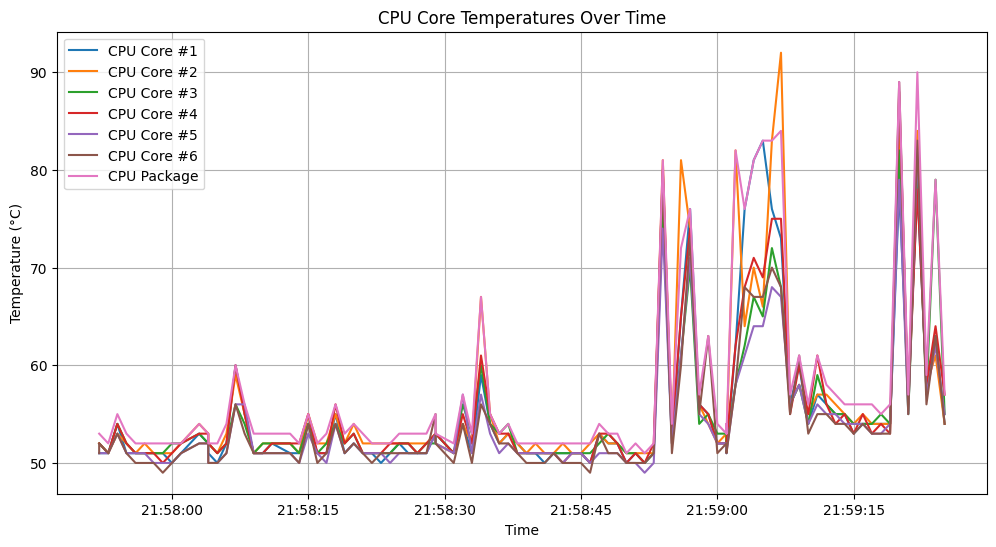

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "extracted_temperatures.csv"
data = pd.read_csv(file_path, skiprows=1)


data['Time'] = pd.to_datetime(data['Time'], format='%m/%d/%Y %H:%M:%S')


plt.figure(figsize=(12, 6))


for column in data.columns[1:]:
    plt.plot(data['Time'], data[column], label=column)

plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("CPU Core Temperatures Over Time")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


            Unnamed: 0 /intelcpu/0/load/1 /intelcpu/0/load/2  \
1  2024-11-16 21:57:52         29.2307682           3.076923   
2  2024-11-16 21:57:52         26.9230728         7.69230747   
3  2024-11-16 21:57:53             28.125            0.78125   
4  2024-11-16 21:57:54            26.5625            3.90625   
5  2024-11-16 21:57:55           28.90625                  0   
..                 ...                ...                ...   
92 2024-11-16 21:59:21           13.24519         2.30768919   
93 2024-11-16 21:59:22            2.34375            10.9375   
94 2024-11-16 21:59:23             7.8125           14.84375   
95 2024-11-16 21:59:24            0.78125               6.25   
96 2024-11-16 21:59:25             1.5625            5.46875   

   /intelcpu/0/load/3 /intelcpu/0/load/4 /intelcpu/0/load/5  \
1          1.53846145           3.076923         1.53846145   
2            3.076923           5.384612                  0   
3                   0            0.78125  

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0297 - val_loss: 0.1106
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0241 - val_loss: 0.1035
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0210 - val_loss: 0.1003
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0198 - val_loss: 0.0986
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0206 - val_loss: 0.0929
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0208 - val_loss: 0.0842
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0178 - val_loss: 0.0804
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0161 - val_loss: 0.0788
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0173 - val_loss: 0.0766
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0180 - val_loss: 0.0754
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0152 - val_loss: 0.0735
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0157 - val_loss: 0.0697


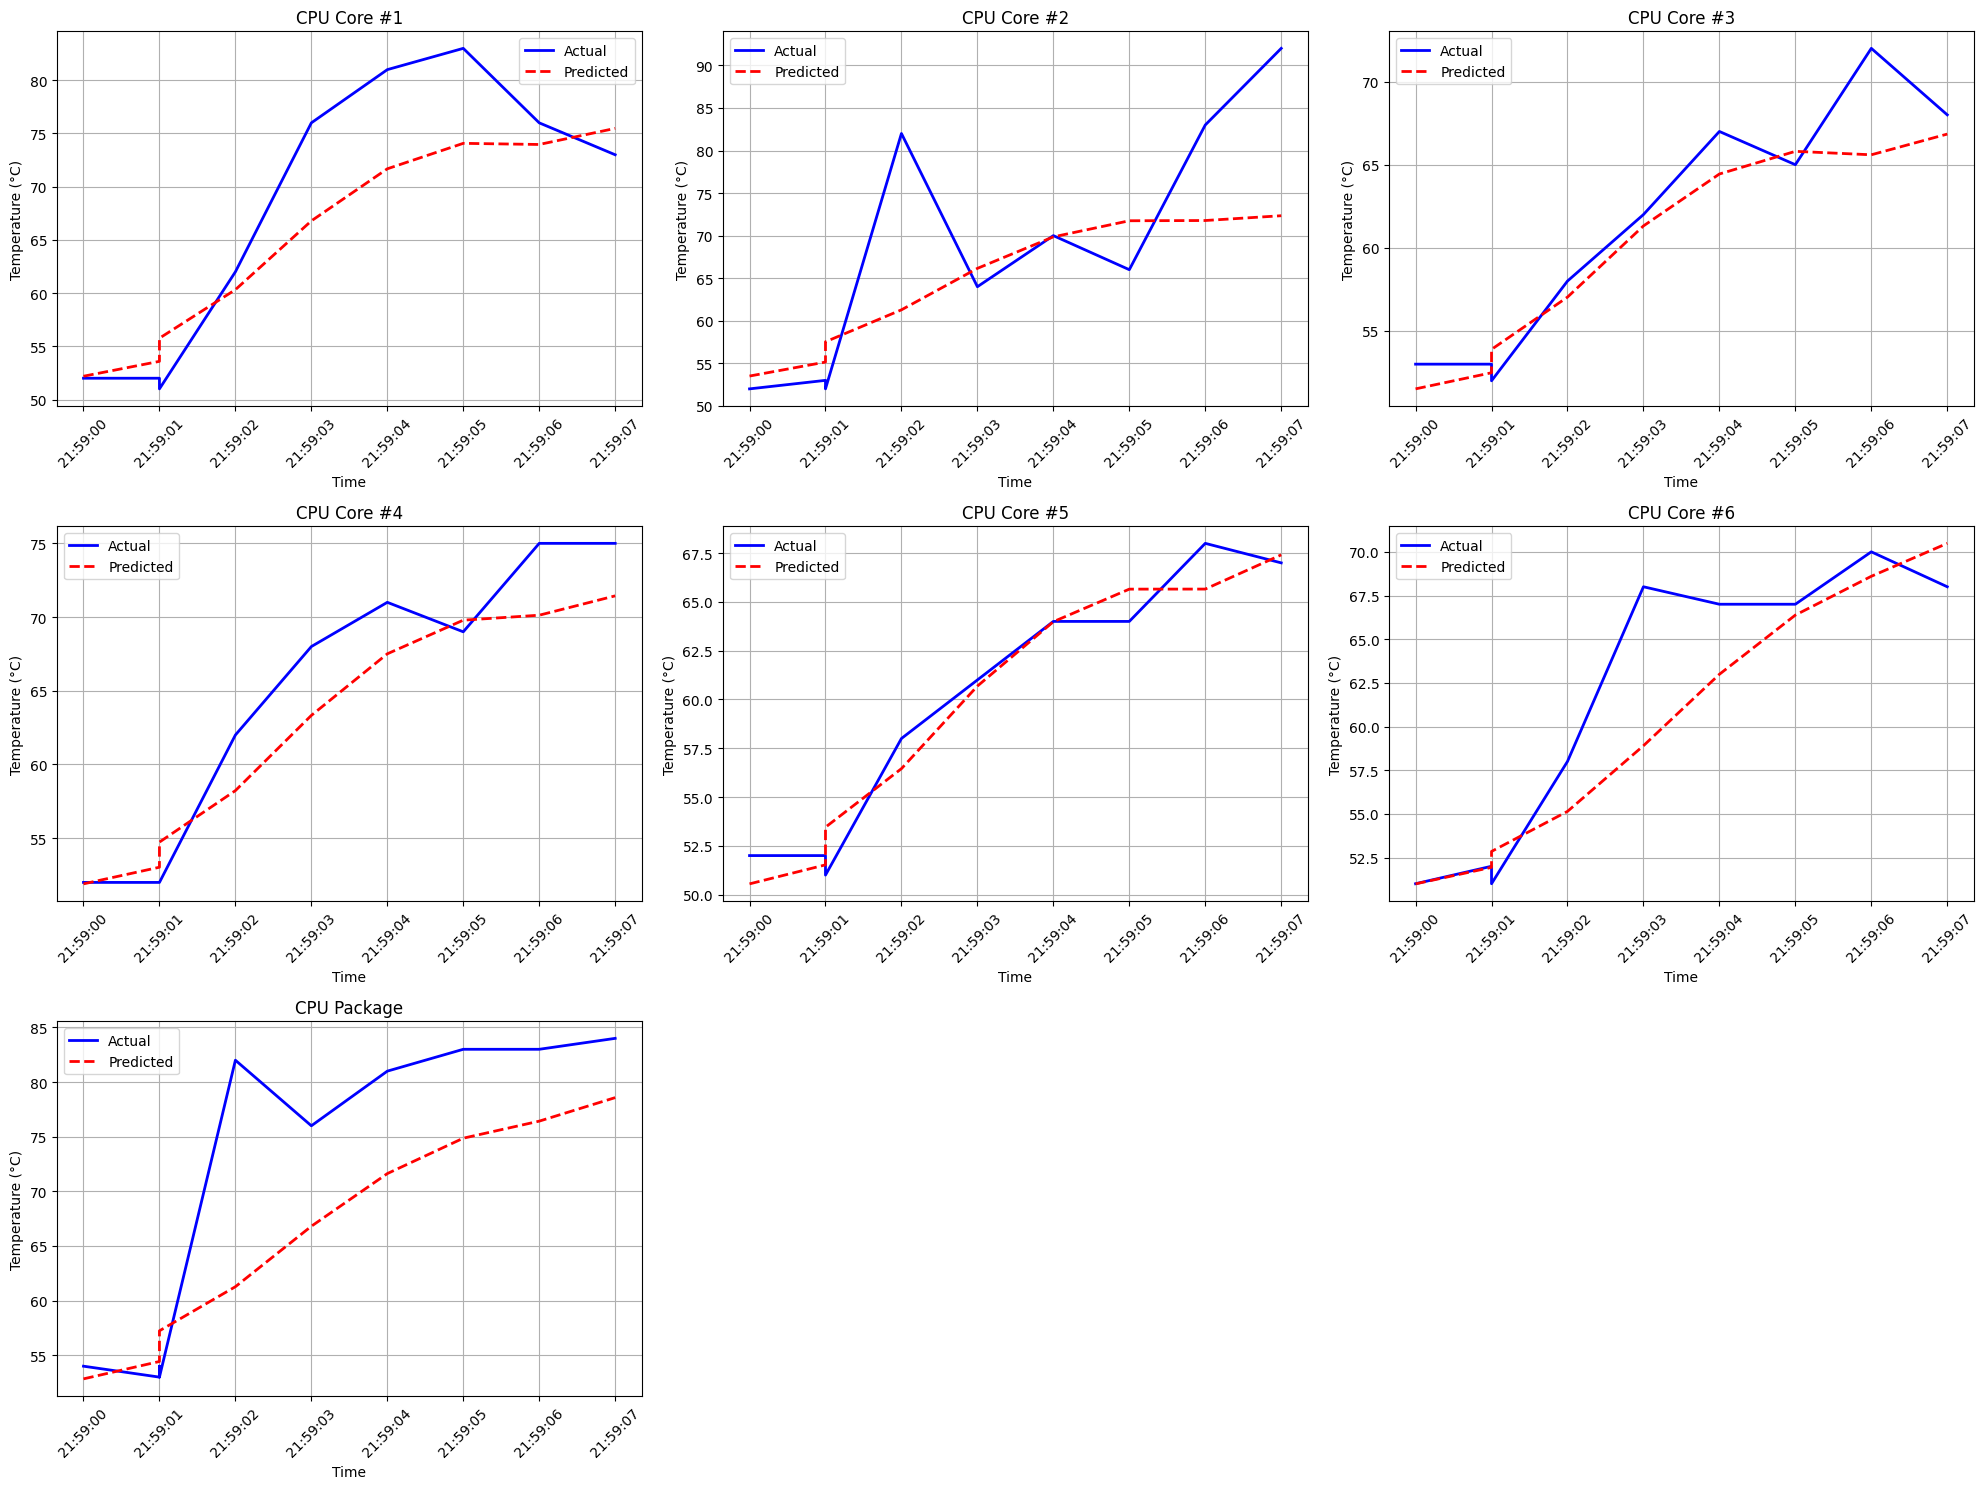

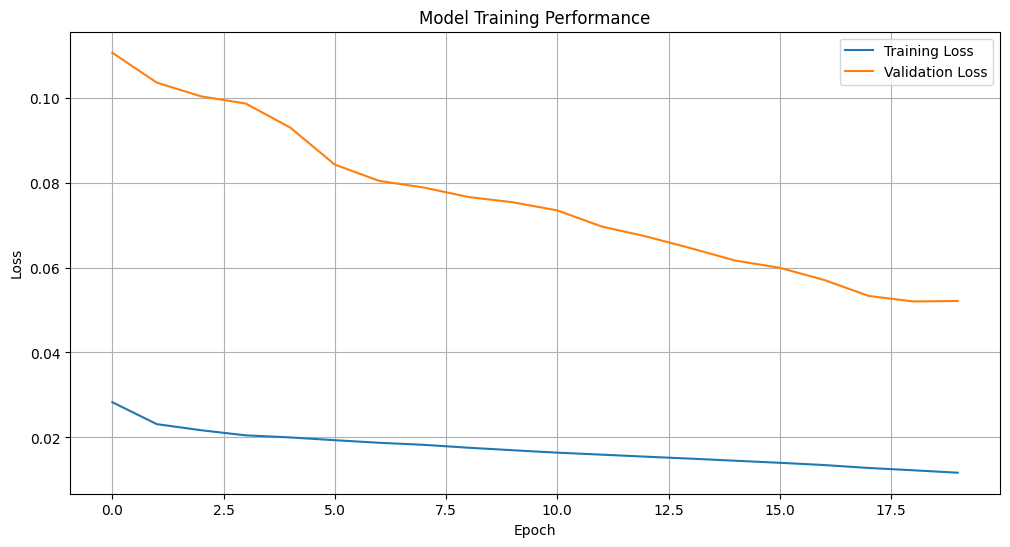


Temperature Prediction Summary:

Timestamp range: 2024-11-16T21:59:00.000000000 to 2024-11-16T21:59:07.000000000

CPU Core #1:
Average Predicted Temperature: 63.89°C
Average Actual Temperature: 65.70°C

CPU Core #2:
Average Predicted Temperature: 63.59°C
Average Actual Temperature: 66.60°C

CPU Core #3:
Average Predicted Temperature: 59.24°C
Average Actual Temperature: 60.30°C

CPU Core #4:
Average Predicted Temperature: 61.42°C
Average Actual Temperature: 62.80°C

CPU Core #5:
Average Predicted Temperature: 58.81°C
Average Actual Temperature: 58.90°C

CPU Core #6:
Average Predicted Temperature: 59.10°C
Average Actual Temperature: 60.30°C

CPU Package:
Average Predicted Temperature: 65.02°C
Average Actual Temperature: 70.30°C


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


data= pd.read_csv("/content/OpenHardwareMonitorLog-2024-11-16.csv")

# Drop the second row (redundant headers)
data= data.drop(index=0)

# Convert the first column to datetime and store original timestamps
timestamps= pd.to_datetime(data['Unnamed: 0'])
data['Unnamed: 0'] = timestamps
print(data)
# creating cyclical time features
data['hour'] = data['Unnamed: 0'].dt.hour
data['day_of_week'] = data['Unnamed: 0'].dt.dayofweek
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)
data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)


temp_columns = [
    '/intelcpu/0/temperature/0',
    '/intelcpu/0/temperature/1',
    '/intelcpu/0/temperature/2',
    '/intelcpu/0/temperature/3',
    '/intelcpu/0/temperature/4',
    '/intelcpu/0/temperature/5',
    '/intelcpu/0/temperature/6'
]

exclude_columns = ['Unnamed: 0', 'hour', 'day_of_week'] + temp_columns
feature_columns = [col for col in data.columns if col not in exclude_columns]
feature_columns.extend(['hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos'])

X = data[feature_columns].astype(float)
y = data[temp_columns].astype(float)
print(X)
X = X.fillna(0)
y = y.fillna(y.mean())

scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
scaled_X = scaler_X.fit_transform(X)
scaled_y = scaler_y.fit_transform(y)

def create_sequences(data, targets, times, sequence_length):
    """Create sequences for LSTM input with corresponding timestamps"""
    x, y, t = [], [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:(i + sequence_length)])
        y.append(targets[i:(i + sequence_length)])
        t.append(times[i:(i + sequence_length)])
    return np.array(x), np.array(y), np.array(t)

#create sequences with timestamps
sequence_length = 10
X_seq, y_seq, time_seq = create_sequences(scaled_X, scaled_y, timestamps.values, sequence_length)

#split the data including timestamps
train_size = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]
time_train, time_test = time_seq[:train_size], time_seq[train_size:]

#model definition and training remains the same...
model = Sequential([
    LSTM(64, input_shape=(sequence_length, X_seq.shape[2]), return_sequences=True),
    LSTM(32, return_sequences=True),
    Dense(len(temp_columns))
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, len(temp_columns)))
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, len(temp_columns)))
y_test_rescaled = y_test_rescaled.reshape(y_test.shape)
y_pred_rescaled = y_pred_rescaled.reshape(y_pred.shape)


plt.figure(figsize=(20, 15))
titles = ['CPU Core #1', 'CPU Core #2', 'CPU Core #3', 'CPU Core #4',
         'CPU Core #5', 'CPU Core #6', 'CPU Package']

for i in range(len(temp_columns)):
    plt.subplot(3, 3, i+1)

    sequence_idx = 0
    timestamps_to_plot = pd.to_datetime(time_test[sequence_idx])

    plt.plot(timestamps_to_plot, y_test_rescaled[sequence_idx, :, i],
            'b-', label='Actual', linewidth=2)
    plt.plot(timestamps_to_plot, y_pred_rescaled[sequence_idx, :, i],
            'r--', label='Predicted', linewidth=2)

    plt.title(titles[i])
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


print("\nTemperature Prediction Summary:")
sequence_idx= 0
print(f"\nTimestamp range: {time_test[sequence_idx][0]} to {time_test[sequence_idx][-1]}")

for i, title in enumerate(titles):
    print(f"\n{title}:")

    print(f"Average Predicted Temperature: {np.mean(y_pred_rescaled[sequence_idx, :, i]):.2f}°C")
    print(f"Average Actual Temperature: {np.mean(y_test_rescaled[sequence_idx, :, i]):.2f}°C")